# EDA: Анализ данных опросов пользователей мобильного приложения

## Загрузка и первичный анализ данных


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

sns.set_style("whitegrid")
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

## Загрузка данных


In [17]:
data_path = Path('data/app_survey.csv')
df = pd.read_csv(data_path)

print(f"Данные успешно загружены из {data_path}")
print(f"Размерность данных: {df.shape}")
print(f"Количество строк: {df.shape[0]:,}")
print(f"Количество столбцов: {df.shape[1]}")


Данные успешно загружены из data/app_survey.csv
Размерность данных: (42387, 9)
Количество строк: 42,387
Количество столбцов: 9


## Первый взгляд на данные


In [18]:
# Первые строки данных
df.head(10)


,user_id,survey_creation_dt,survey_response_dt,csat_level,language,age,gender,tenure_years,user_income
0,user_00000,2025-04-28 16:01:51,2025-05-07 03:24:28,1,RU,35-44,M,21.105392,10000-25000
1,user_00001,2025-04-25 03:02:23,2025-04-29 13:12:29,5,RU,35-44,M,21.129793,68000-100000
2,user_00002,2025-04-30 11:02:14,2025-04-20 21:09:01,5,RU,45-54,M,21.098074,NaN
3,user_00003,2025-04-25 09:32:18,2025-04-26 19:51:12,5,RU,45-54,M,21.115544,25000-44000
4,user_00004,2025-04-30 08:32:06,2025-05-01 18:33:35,5,RU,45-54,M,21.127961,44000-68000
5,user_00005,2025-05-07 04:30:27,2025-05-18 15:10:16,5,RU,55-65,F,21.138782,NaN
6,user_00006,2025-05-11 22:31:28,2025-05-17 08:36:50,5,RU,45-54,M,21.132181,NaN
7,user_00007,2025-05-09 04:30:08,2025-05-15 14:56:13,1,RU,35-44,M,21.138978,NaN
8,user_00008,2025-04-25 16:01:16,2025-04-26 12:22:59,5,RU,45-54,M,21.105417,NaN
9,user_00009,2025-04-26 13:31:09,2025-05-01 23:33:50,5,RU,35-44,M,21.120511,10000-25000


In [19]:
# Информация о данных
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42387 entries, 0 to 42386
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_id             42387 non-null  object 
 1   survey_creation_dt  42387 non-null  object 
 2   survey_response_dt  42387 non-null  object 
 3   csat_level          42387 non-null  int64  
 4   language            35561 non-null  object 
 5   age                 40939 non-null  object 
 6   gender              42387 non-null  object 
 7   tenure_years        42387 non-null  float64
 8   user_income         32013 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 2.9+ MB


In [20]:
# Названия столбцов
print("Столбцы в датасете:")
print(df.columns.tolist())
print(f"\nВсего столбцов: {len(df.columns)}")


Столбцы в датасете:
['user_id', 'survey_creation_dt', 'survey_response_dt', 'csat_level', 'language', 'age', 'gender', 'tenure_years', 'user_income']

Всего столбцов: 9


## Проверка пропущенных значений


Столбцы с пропущенными значениями:
             Количество пропусков  Процент пропусков
user_income                 10374          24.474485
language                     6826          16.103994
age                          1448           3.416142


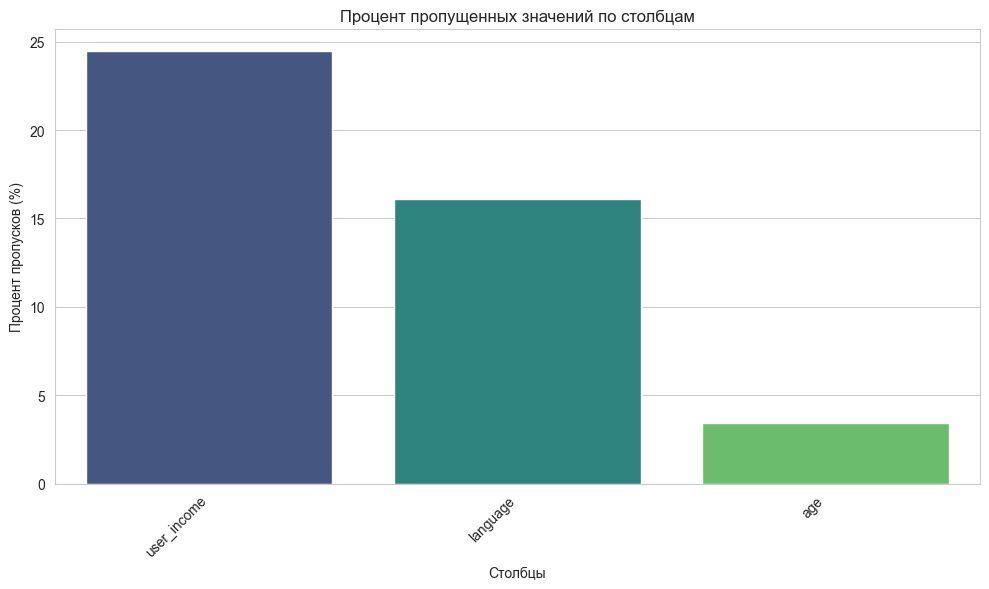


Общее количество пропущенных значений: 18648


In [21]:
# Проверка пропущенных значений
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100

missing_df = pd.DataFrame({
    'Количество пропусков': missing_values,
    'Процент пропусков': missing_percent
})
missing_df = missing_df[missing_df['Количество пропусков'] > 0].sort_values('Количество пропусков', ascending=False)

if len(missing_df) > 0:
    print("Столбцы с пропущенными значениями:")
    print(missing_df)
    
    # Визуализация пропущенных значений
    plt.figure(figsize=(10, 6))
    sns.barplot(data=missing_df.reset_index(), x='index', y='Процент пропусков', hue='index', palette='viridis', legend=False)
    plt.title('Процент пропущенных значений по столбцам')
    plt.xlabel('Столбцы')
    plt.ylabel('Процент пропусков (%)')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("Пропущенных значений не обнаружено")

print(f"\nОбщее количество пропущенных значений: {df.isnull().sum().sum()}")


## Базовая статистика


In [22]:
# Описательная статистика для числовых переменных
df.describe()


,csat_level,tenure_years
count,42387.000000,42387.000000
mean,4.102767,9.801147
std,1.506246,7.591410
min,1.000000,0.000000
25%,4.000000,2.132807
50%,5.000000,9.308819
75%,5.000000,16.941052
max,5.000000,21.195642


In [23]:
# Описательная статистика для категориальных переменных
# Исключаем ID и даты из категориальных переменных
exclude_cols = ['user_id', 'survey_creation_dt', 'survey_response_dt']
categorical_cols = [col for col in df.select_dtypes(include=['object']).columns 
                    if col not in exclude_cols]
print("Категориальные переменные:")
for col in categorical_cols:
    print(f"\n{col}:")
    print(f"  Уникальных значений: {df[col].nunique()}")
    print(f"  Топ-5 значений:")
    print(df[col].value_counts().head())


Категориальные переменные:

language:
  Уникальных значений: 1
  Топ-5 значений:
language
RU    35561
Name: count, dtype: int64

age:
  Уникальных значений: 5
  Топ-5 значений:
age
35-44    11835
25-34     9669
45-54     9483
55-65     6312
18-24     3640
Name: count, dtype: int64

gender:
  Уникальных значений: 2
  Топ-5 значений:
gender
M    32413
F     9974
Name: count, dtype: int64

user_income:
  Уникальных значений: 6
  Топ-5 значений:
user_income
10000-25000     18354
25000-44000      6206
>100000          2418
44000-68000      2095
68000-100000     1641
Name: count, dtype: int64


## Предобработка данных

### Преобразование типов данных


In [24]:
# Преобразование дат
df['survey_creation_dt'] = pd.to_datetime(df['survey_creation_dt'], errors='coerce')
df['survey_response_dt'] = pd.to_datetime(df['survey_response_dt'], errors='coerce')

# Проверка преобразования
print("Типы данных после преобразования:")
print(df.dtypes)
print(f"\nПамять, используемая датафреймом: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")


Типы данных после преобразования:
user_id                       object
survey_creation_dt    datetime64[ns]
survey_response_dt    datetime64[ns]
csat_level                     int64
language                      object
age                           object
gender                        object
tenure_years                 float64
user_income                   object
dtype: object

Память, используемая датафреймом: 11.92 MB


## Распределение целевой переменной (csat_level)


Распределение оценок пользователей:
csat_level
1     6732
2     1187
3     2175
4     3192
5    29101
Name: count, dtype: int64

Средняя оценка: 4.10
Медианная оценка: 5.00


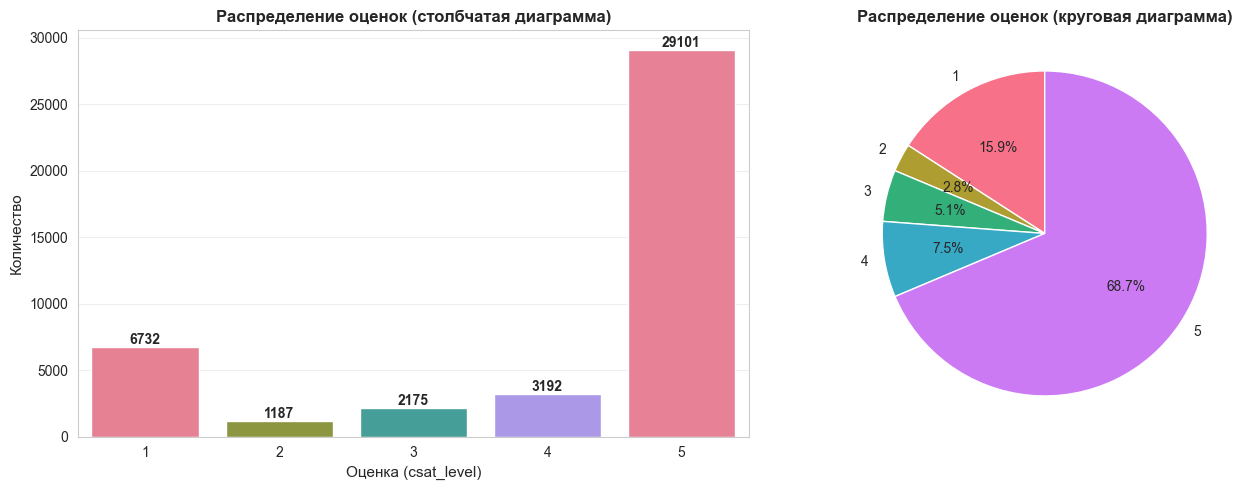

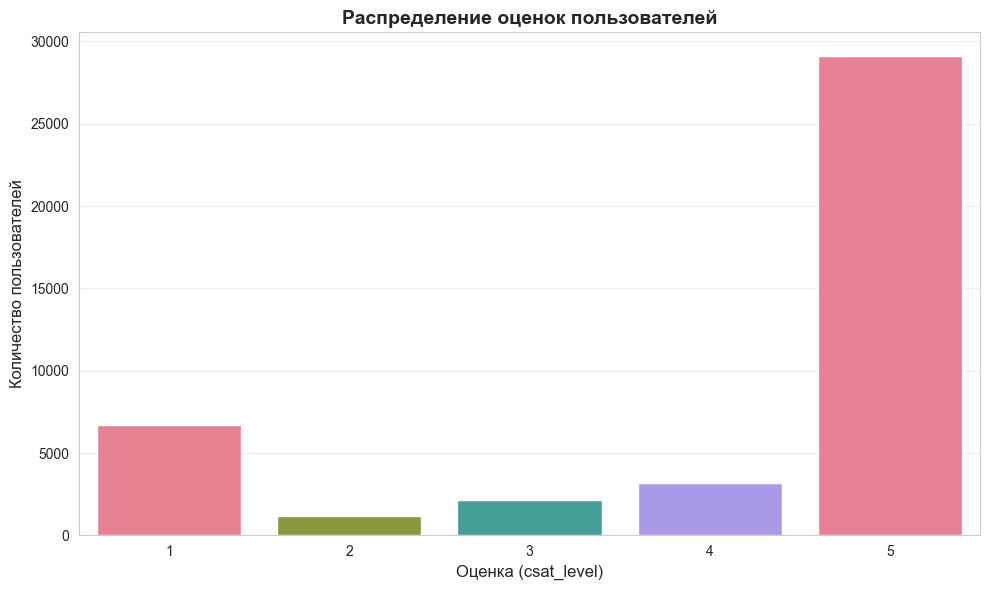

In [25]:
# Распределение оценок
print("Распределение оценок пользователей:")
print(df['csat_level'].value_counts().sort_index())
print(f"\nСредняя оценка: {df['csat_level'].mean():.2f}")
print(f"Медианная оценка: {df['csat_level'].median():.2f}")

# Визуализация распределения с использованием seaborn
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Столбчатая диаграмма с seaborn
csat_counts = df['csat_level'].value_counts().sort_index()
sns.barplot(x=csat_counts.index, y=csat_counts.values, ax=axes[0], hue=csat_counts.index, palette='husl', legend=False)
axes[0].set_title('Распределение оценок (столбчатая диаграмма)', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Оценка (csat_level)', fontsize=11)
axes[0].set_ylabel('Количество', fontsize=11)
axes[0].grid(axis='y', alpha=0.3)

# Добавление значений на столбцы
for i, v in enumerate(csat_counts.values):
    axes[0].text(i, v, str(v), ha='center', va='bottom', fontweight='bold')

# Круговая диаграмма
palette = sns.color_palette('husl', len(csat_counts))
csat_counts.plot(kind='pie', ax=axes[1], autopct='%1.1f%%', startangle=90, colors=palette)
axes[1].set_title('Распределение оценок (круговая диаграмма)', fontsize=12, fontweight='bold')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

# Дополнительная визуализация: распределение с гистограммой
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='csat_level', hue='csat_level', palette='husl', order=sorted(df['csat_level'].unique()), legend=False)
plt.title('Распределение оценок пользователей', fontsize=14, fontweight='bold')
plt.xlabel('Оценка (csat_level)', fontsize=12)
plt.ylabel('Количество пользователей', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


## Визуализация распределений числовых переменных


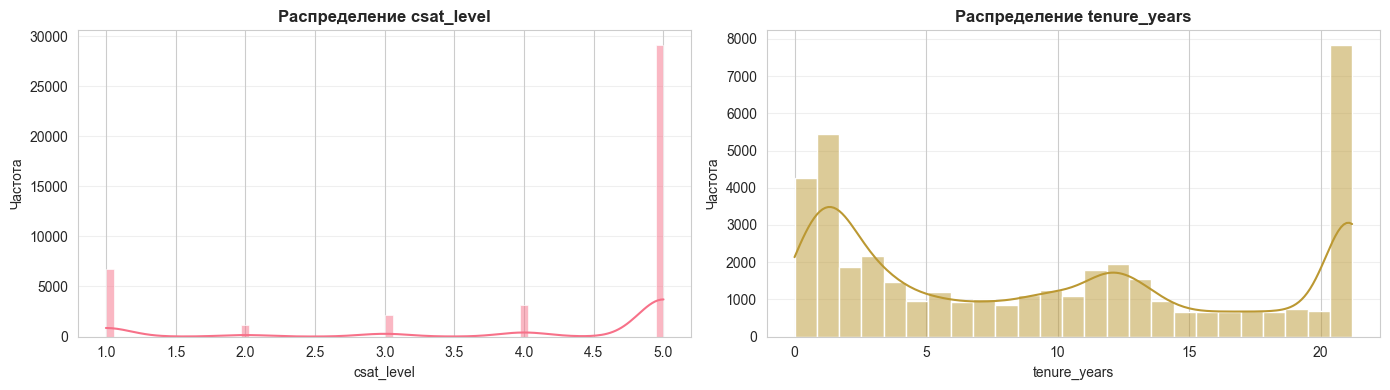

In [26]:
# Распределение числовых переменных
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

if numeric_cols:
    n_cols = len(numeric_cols)
    n_rows = (n_cols + 1) // 2
    
    fig, axes = plt.subplots(n_rows, 2, figsize=(14, 4 * n_rows))
    axes = axes.flatten() if n_cols > 1 else [axes]
    
    palette = sns.color_palette('husl')
    for idx, col in enumerate(numeric_cols):
        if idx < len(axes):
            sns.histplot(data=df, x=col, kde=True, ax=axes[idx], color=palette[idx % len(palette)])
            axes[idx].set_title(f'Распределение {col}', fontweight='bold')
            axes[idx].set_xlabel(col)
            axes[idx].set_ylabel('Частота')
            axes[idx].grid(axis='y', alpha=0.3)
    
    # Скрыть лишние subplots
    for idx in range(len(numeric_cols), len(axes)):
        axes[idx].set_visible(False)
    
    plt.tight_layout()
    plt.show()


## Анализ взаимосвязей: оценка vs другие переменные


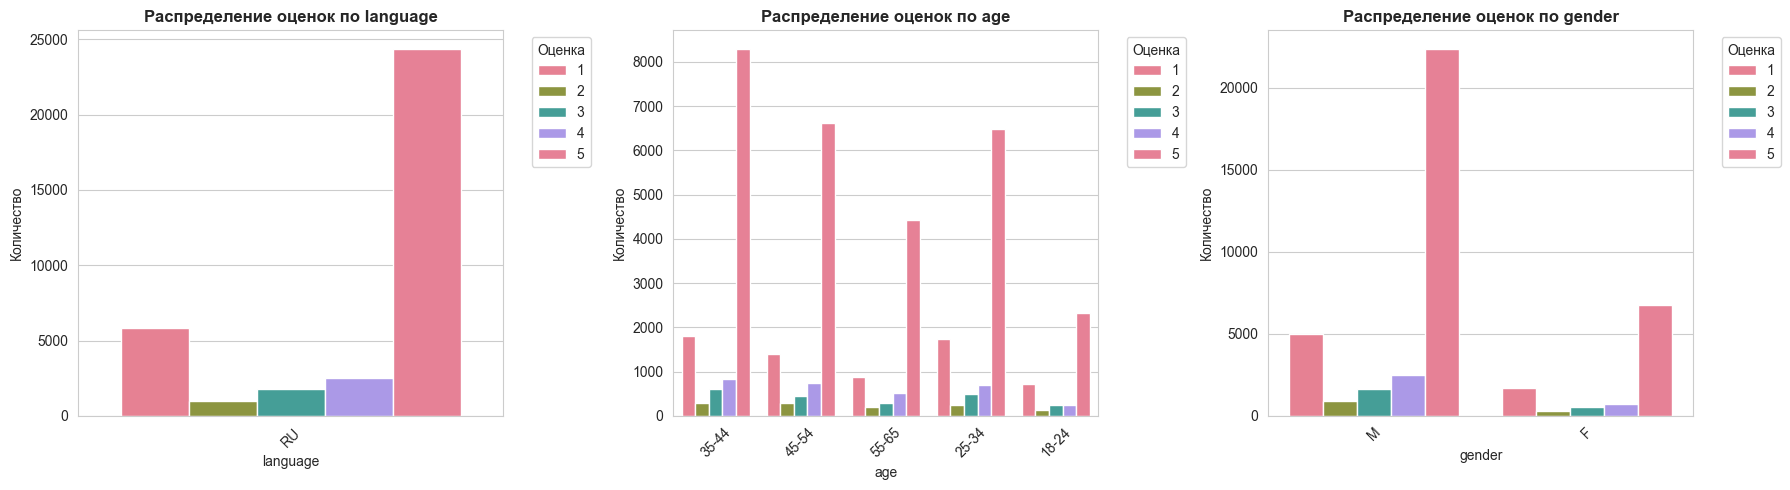

In [27]:
# Визуализация связи между csat_level и категориальными переменными
categorical_cols = [col for col in ['language', 'age', 'gender'] if col in df.columns]

if categorical_cols:
    n_cols = len(categorical_cols)
    fig, axes = plt.subplots(1, n_cols, figsize=(6 * n_cols, 5))
    axes = axes if n_cols > 1 else [axes]
    
    for idx, col in enumerate(categorical_cols):
        sns.countplot(data=df, x=col, hue='csat_level', ax=axes[idx], palette='husl')
        axes[idx].set_title(f'Распределение оценок по {col}', fontweight='bold')
        axes[idx].set_xlabel(col)
        axes[idx].set_ylabel('Количество')
        axes[idx].legend(title='Оценка', bbox_to_anchor=(1.05, 1), loc='upper left')
        axes[idx].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()


## Box plots для числовых переменных по оценкам


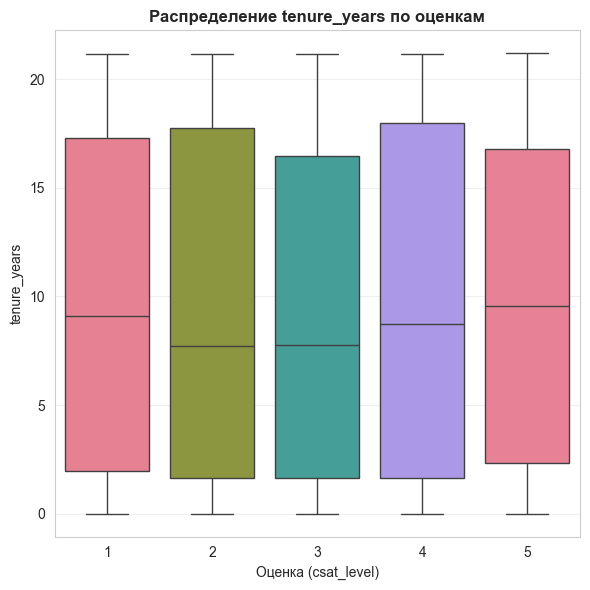

In [28]:
# Box plots для числовых переменных в зависимости от оценки
numeric_cols_for_box = [col for col in ['tenure_years'] if col in df.columns]

if numeric_cols_for_box:
    n_cols = len(numeric_cols_for_box)
    fig, axes = plt.subplots(1, n_cols, figsize=(6 * n_cols, 6))
    axes = axes if n_cols > 1 else [axes]
    
    for idx, col in enumerate(numeric_cols_for_box):
        sns.boxplot(data=df, x='csat_level', y=col, ax=axes[idx], hue='csat_level', palette='husl', legend=False)
        axes[idx].set_title(f'Распределение {col} по оценкам', fontweight='bold')
        axes[idx].set_xlabel('Оценка (csat_level)')
        axes[idx].set_ylabel(col)
        axes[idx].grid(axis='y', alpha=0.3)
    
    plt.tight_layout()
    plt.show()


## Корреляционная матрица (для числовых переменных)


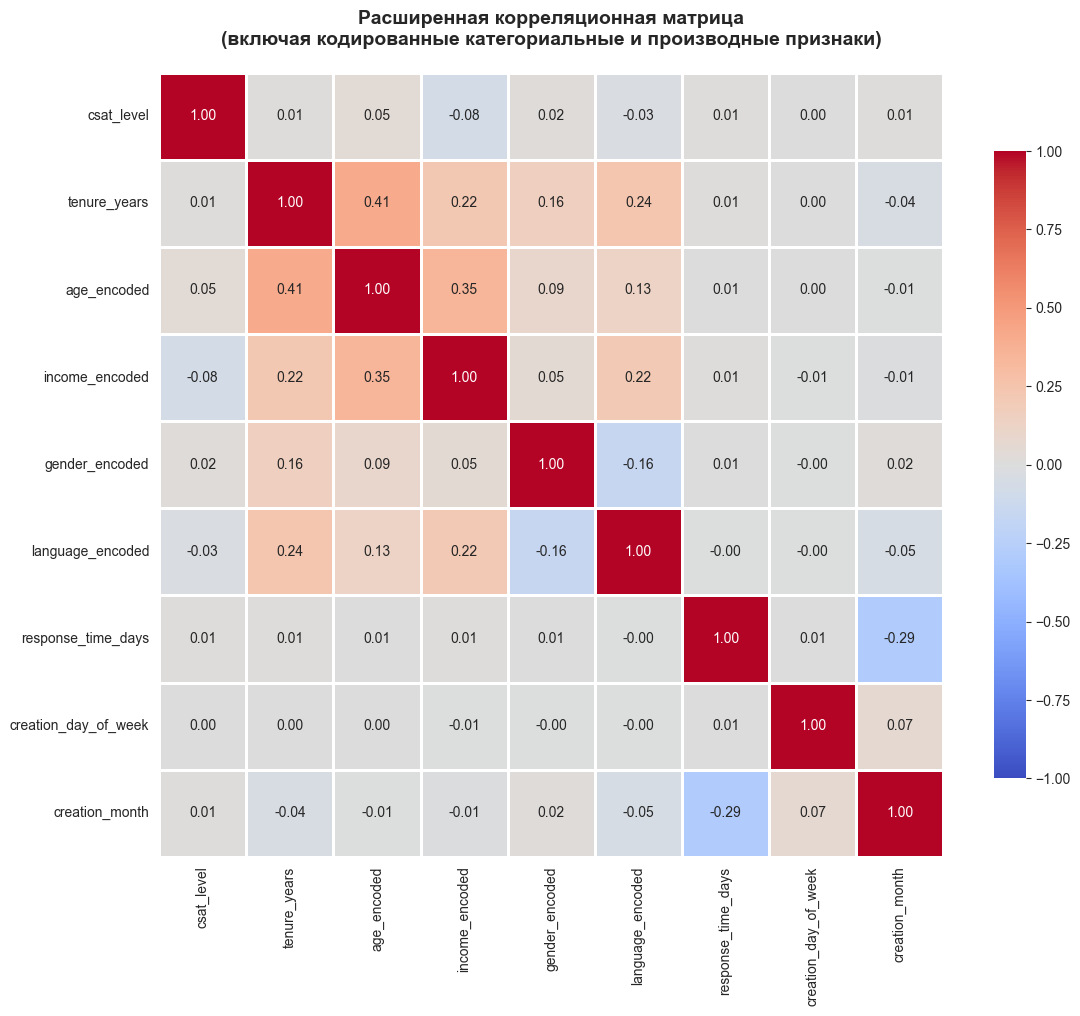


Корреляция с целевой переменной (csat_level):
age_encoded              :  0.046
gender_encoded           :  0.019
tenure_years             :  0.011
creation_month           :  0.011
response_time_days       :  0.009
creation_day_of_week     :  0.001
language_encoded         : -0.028
income_encoded           : -0.078


In [29]:
# Расширенная корреляционная матрица с кодированными категориальными переменными

# Создаем копию датафрейма для работы
df_corr = df.copy()

# 1. Кодирование возраста (ordinal encoding)
age_mapping = {
    '<18': 0,
    '18-24': 1,
    '25-34': 2,
    '35-44': 3,
    '45-54': 4,
    '55-65': 5,
    '>65': 6
}
if 'age' in df_corr.columns:
    df_corr['age_encoded'] = df_corr['age'].map(age_mapping)

# 2. Кодирование дохода (ordinal encoding)
income_mapping = {
    '<10000': 1,
    '10000-25000': 2,
    '25000-44000': 3,
    '44000-68000': 4,
    '68000-100000': 5,
    '>100000': 6
}
if 'user_income' in df_corr.columns:
    df_corr['income_encoded'] = df_corr['user_income'].map(income_mapping)

# 3. Бинарное кодирование пола
if 'gender' in df_corr.columns:
    df_corr['gender_encoded'] = df_corr['gender'].map({'M': 1, 'F': 0})

# 4. Бинарное кодирование языка
if 'language' in df_corr.columns:
    df_corr['language_encoded'] = (df_corr['language'] == 'RU').astype(int)

# 5. Производные признаки из дат
if 'survey_creation_dt' in df_corr.columns and 'survey_response_dt' in df_corr.columns:
    df_corr['response_time_days'] = (df_corr['survey_response_dt'] - df_corr['survey_creation_dt']).dt.total_seconds() / (24 * 3600)
    df_corr['creation_day_of_week'] = df_corr['survey_creation_dt'].dt.dayofweek
    df_corr['creation_month'] = df_corr['survey_creation_dt'].dt.month

# Выбираем все числовые столбцы для корреляции
potential_corr_cols = [
    'csat_level',
    'tenure_years',
    'age_encoded',
    'income_encoded',
    'gender_encoded',
    'language_encoded',
    'response_time_days',
    'creation_day_of_week',
    'creation_month'
]
corr_cols = [col for col in potential_corr_cols if col in df_corr.columns]

# Создаем корреляционную матрицу
corr_matrix = df_corr[corr_cols].corr()

# Визуализация
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8}, 
            vmin=-1, vmax=1)
plt.title('Расширенная корреляционная матрица\n(включая кодированные категориальные и производные признаки)', 
          fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Вывод корреляций с целевой переменной
print("\nКорреляция с целевой переменной (csat_level):")
print("=" * 50)
csat_corr = corr_matrix['csat_level'].sort_values(ascending=False)
for col, corr_val in csat_corr.items():
    if col != 'csat_level':
        print(f"{col:25s}: {corr_val:6.3f}")


## Фокус на корреляциях с целевой переменной


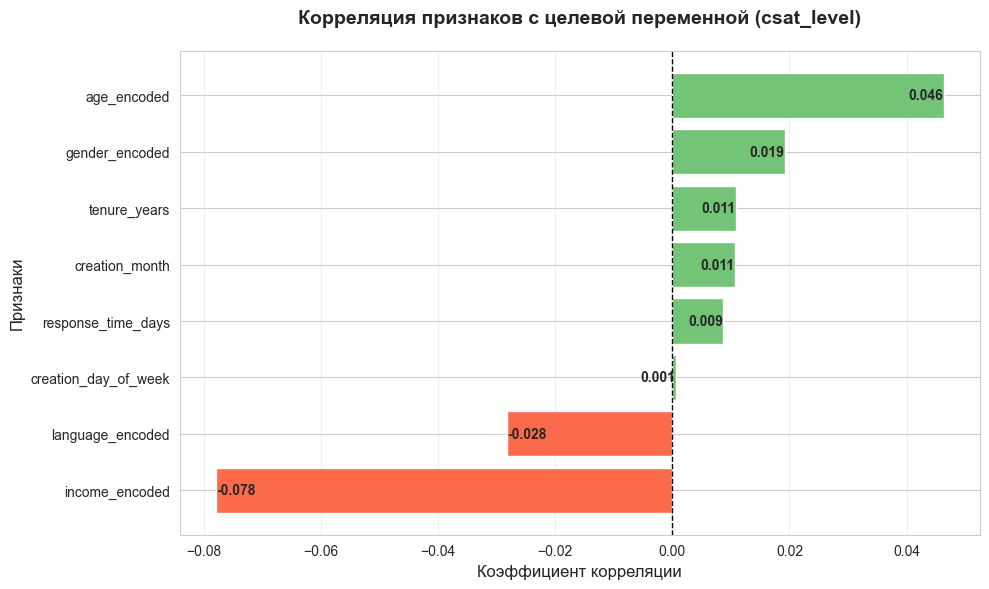


Интерпретация корреляций:
|r| < 0.1  : Очень слабая корреляция
0.1 ≤ |r| < 0.3  : Слабая корреляция
0.3 ≤ |r| < 0.5  : Умеренная корреляция
0.5 ≤ |r| < 0.7  : Сильная корреляция
|r| ≥ 0.7  : Очень сильная корреляция


In [30]:
# Визуализация корреляций с целевой переменной
if 'csat_level' in corr_matrix.columns:
    csat_correlations = corr_matrix['csat_level'].drop('csat_level').sort_values(ascending=True)
    
    plt.figure(figsize=(10, 6))
    # Создаем цветовую палитру на основе знака корреляции
    red_color = sns.color_palette('Reds_r', 1)[0]
    green_color = sns.color_palette('Greens', 1)[0]
    colors = [red_color if x < 0 else green_color for x in csat_correlations.values]
    
    plt.barh(range(len(csat_correlations)), csat_correlations.values, color=colors)
    plt.yticks(range(len(csat_correlations)), csat_correlations.index)
    plt.axvline(x=0, color='black', linestyle='--', linewidth=1)
    plt.title('Корреляция признаков с целевой переменной (csat_level)', 
              fontsize=14, fontweight='bold', pad=20)
    plt.xlabel('Коэффициент корреляции', fontsize=12)
    plt.ylabel('Признаки', fontsize=12)
    plt.grid(axis='x', alpha=0.3)
    
    # Добавление значений на столбцы
    for i, (idx, val) in enumerate(csat_correlations.items()):
        plt.text(val, i, f'{val:.3f}', va='center', 
                ha='left' if val < 0 else 'right', fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    # Статистическая значимость корреляций
    print("\nИнтерпретация корреляций:")
    print("=" * 50)
    print("|r| < 0.1  : Очень слабая корреляция")
    print("0.1 ≤ |r| < 0.3  : Слабая корреляция")
    print("0.3 ≤ |r| < 0.5  : Умеренная корреляция")
    print("0.5 ≤ |r| < 0.7  : Сильная корреляция")
    print("|r| ≥ 0.7  : Очень сильная корреляция")
